# Testing the file path

In [28]:
filepath = "test.jpg"
print("Opening file:", filepath)

Opening file: test.jpg


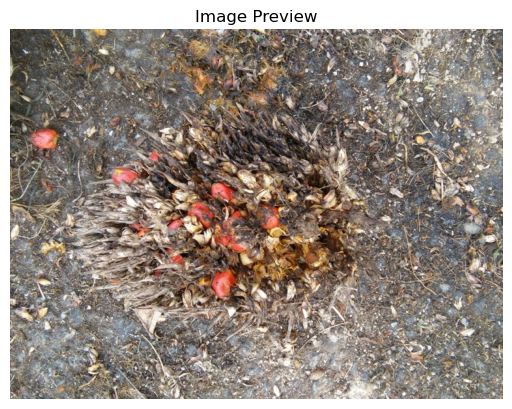

In [30]:
import matplotlib.pyplot as plt

img = cv2.imread(filepath)
if img is None:
    print("❌ Failed to load image. Check the path.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
    plt.imshow(img_rgb)
    plt.title("Image Preview")
    plt.axis('off')
    plt.show()


In [31]:
import os

data_dir = "projectDataset"
categories = ["masak", "belum_masak"]

# Check if the folders exist
for category in categories:
    category_path = os.path.join(data_dir, category)
    if os.path.exists(category_path):
        print(f"✅ Found category: {category}")
        # Print a list of files in this category folder
        for filename in os.listdir(category_path):
            print(f" - {filename}")
    else:
        print(f"❌ Category folder not found: {category}")


✅ Found category: masak
 - Masak (1).jpg
 - Masak (10).jpg
 - Masak (100).jpg
 - Masak (101).jpg
 - Masak (102).jpg
 - Masak (103).jpg
 - Masak (104).jpg
 - Masak (105).jpg
 - Masak (106).jpg
 - Masak (107).jpg
 - Masak (108).jpg
 - Masak (109).jpg
 - Masak (11).jpg
 - Masak (110).jpg
 - Masak (111).jpg
 - Masak (112).jpg
 - Masak (113).jpg
 - Masak (114).jpg
 - Masak (115).jpg
 - Masak (116).jpg
 - Masak (117).jpg
 - Masak (118).jpg
 - Masak (119).jpg
 - Masak (12).jpg
 - Masak (120).jpg
 - Masak (121).jpg
 - Masak (126).jpg
 - Masak (13).jpg
 - Masak (130).jpg
 - Masak (138).jpg
 - Masak (139).jpg
 - Masak (14).jpg
 - Masak (140).jpg
 - Masak (141).jpg
 - Masak (142).jpg
 - Masak (143).jpg
 - Masak (144).jpg
 - Masak (145).jpg
 - Masak (149).jpg
 - Masak (15).jpg
 - Masak (150).jpg
 - Masak (151).jpg
 - Masak (152).jpg
 - Masak (153).jpg
 - Masak (157).jpg
 - Masak (159).jpg
 - Masak (16).jpg
 - Masak (161).jpg
 - Masak (166).jpg
 - Masak (167).jpg
 - Masak (17).jpg
 - Masak (170).jp

# Load and Preprocess Images 

In [32]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

data_dir = "projectDataset"
categories = ["masak", "belum_masak"]
img_size = 100

data = []

for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            img_array = cv2.resize(img_array, (img_size, img_size))
            data.append([img_array, class_num])
        except Exception as e:
            pass

np.random.shuffle(data)

X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3) / 255.0
y = np.array(y)


# Build CNN Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 33856)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

# Train the Model

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

history = model.fit(X_train, y_train, 
                    epochs=50, 
                    validation_data=(X_val, y_val))


Epoch 1/50
23/23 [==============================] - 3s 99ms/step - loss: 0.8210 - accuracy: 0.6087 - val_loss: 0.5145 - val_accuracy: 0.7228
Epoch 2/50
23/23 [==============================] - 2s 93ms/step - loss: 0.3968 - accuracy: 0.8329 - val_loss: 0.2769 - val_accuracy: 0.9130
Epoch 3/50
23/23 [==============================] - 2s 89ms/step - loss: 0.2998 - accuracy: 0.8832 - val_loss: 0.2696 - val_accuracy: 0.9076
Epoch 4/50
23/23 [==============================] - 2s 94ms/step - loss: 0.2703 - accuracy: 0.9090 - val_loss: 0.2636 - val_accuracy: 0.8913
Epoch 5/50
23/23 [==============================] - 2s 104ms/step - loss: 0.2249 - accuracy: 0.9334 - val_loss: 0.2422 - val_accuracy: 0.9130
Epoch 6/50
23/23 [==============================] - 2s 104ms/step - loss: 0.1742 - accuracy: 0.9375 - val_loss: 0.2372 - val_accuracy: 0.8859
Epoch 7/50
23/23 [==============================] - 2s 103ms/step - loss: 0.1577 - accuracy: 0.9457 - val_loss: 0.2381 - val_accuracy: 0.9130
Epoch 8/50

# Plot Accuracy and Loss

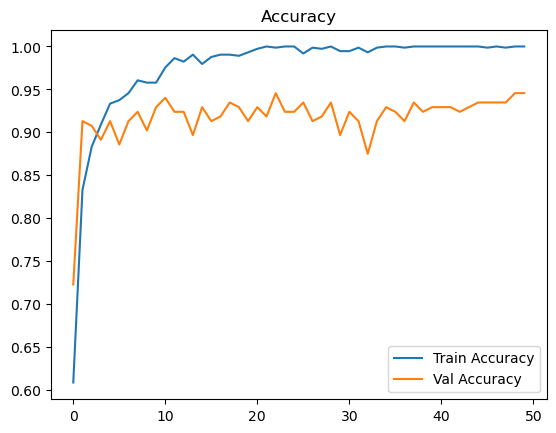

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()


# Test on New Image

In [45]:
import cv2
import numpy as np

img_size = 100  # Make sure this matches the one used during training

def prepare(filepath):
    img_array = cv2.imread(filepath)
    resized_img = cv2.resize(img_array, (img_size, img_size))
    prepared_img = resized_img.reshape(-1, img_size, img_size, 3) / 255.0
    return prepared_img, img_array  # return both resized and original image

# Load and prepare image
file_path = "test3.jpg"
prepared_img, original_img = prepare(file_path)

# Predict
prediction = model.predict(prepared_img)

# Determine result
if prediction[0][0] > 0.5:
    label = "Belum Masak 🍏"
    color = (0, 255, 255)  # Yellow box
else:
    label = "Masak 🍎"
    color = (0, 255, 0)  # Green box

# Draw a box and label in the middle of the image
(h, w, _) = original_img.shape
start_point = (int(w * 0.2), int(h * 0.2))
end_point = (int(w * 0.8), int(h * 0.8))

cv2.rectangle(original_img, start_point, end_point, color, 3)
cv2.putText(original_img, label, (start_point[0], start_point[1] - 10),
            cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

# Show the image
cv2.imshow("Fruit Classification", original_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


1/1 [==============================] - 0s 17ms/step
